# LSTM V/S RNN

## RNN(Vanilla RNN) gradient flow: 

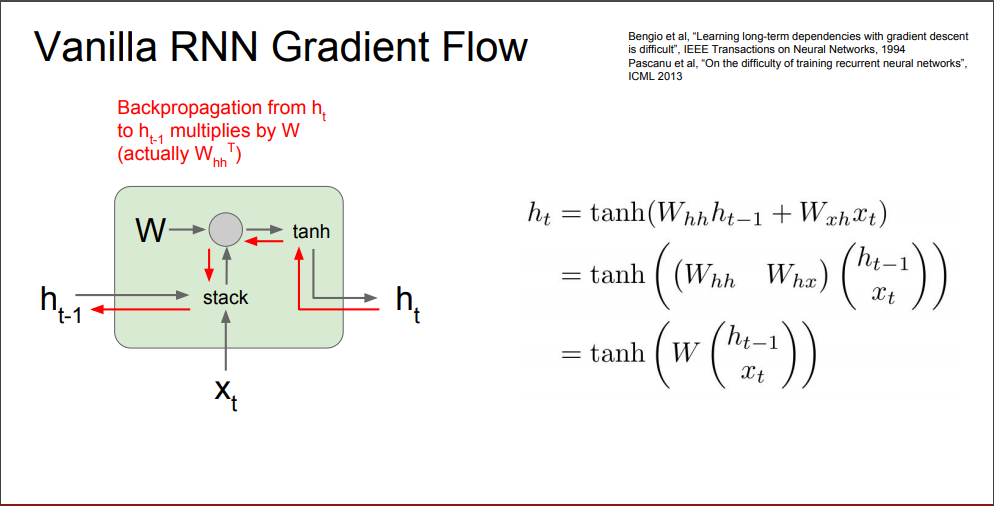

In [14]:
from IPython.display import Image
Image("vanillarnn.png")

## LSTM gradient flow 

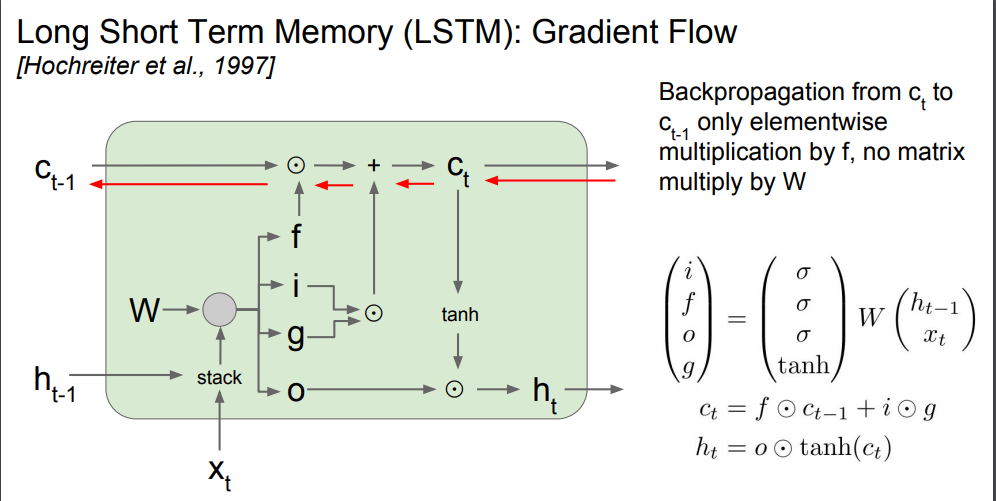

In [16]:
Image("lstm.png")

# Comparing performance of SimpleRNN and CuDNNLSTM on MNIST dataset

### Importing layers and MNIST dataset

In [1]:
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, CuDNNLSTM, RNN, SimpleRNN

In [2]:
mnist = tf.keras.datasets.mnist

In [3]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [4]:
print(x_train.shape)

(60000, 28, 28)


### Pre-process the Data 

In [5]:
x_train = x_train/255.0
x_test = x_test/255.0

## LSTM 

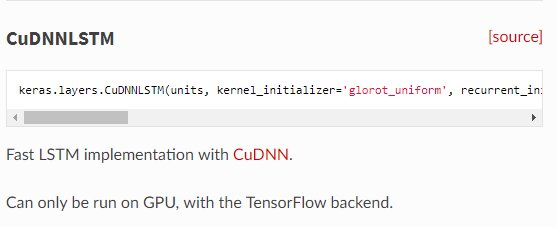

In [6]:
from IPython.display import Image
Image("cudnn.png")

### Architecture 

In [7]:
model = Sequential()

In [8]:
model.add(CuDNNLSTM(128, input_shape=(x_train.shape[1:]), return_sequences=True))
model.add(Dropout(0.2))

model.add(CuDNNLSTM(128))
model.add(Dropout(0.2))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(10, activation='softmax'))

In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
cu_dnnlstm (CuDNNLSTM)       (None, 28, 128)           80896     
_________________________________________________________________
dropout (Dropout)            (None, 28, 128)           0         
_________________________________________________________________
cu_dnnlstm_1 (CuDNNLSTM)     (None, 128)               132096    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                4128      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                330       
Total para

### Compile the Model 

In [10]:
opt = tf.keras.optimizers.Adam(lr=1e-3, decay=1e-5)

In [11]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

### Train the Model 

In [12]:
from keras.callbacks import ModelCheckpoint  
from livelossplot.keras import PlotLossesCallback


checkpointer = ModelCheckpoint(filepath='SavedWeights.hdf5', 
                               verbose=1, save_best_only=True)

his = model.fit(x_train, y_train, 
          epochs=5, validation_data=(x_test, y_test),
          verbose=1, callbacks=[checkpointer])
                                                                                             

<Figure size 1200x800 with 2 Axes>

Log-loss (cost function):
training   (min:    0.054, max:    0.396, cur:    0.054)
validation (min:    0.059, max:    0.103, cur:    0.066)

Accuracy:
training   (min:    0.880, max:    0.986, cur:    0.986)
validation (min:    0.968, max:    0.984, cur:    0.981)
60000/60000 [==============================] - 36s 600us/step - loss: 0.0538 - acc: 0.9858 - val_loss: 0.0656 - val_acc: 0.9814


In [15]:
his.history

{'acc': [0.8797666666666667,
  0.96855,
  0.9775166666666667,
  0.9834833333333334,
  0.98575],
 'loss': [0.3959779765675465,
  0.11797358114160597,
  0.08385619803170363,
  0.06342349546042582,
  0.053839173640256435],
 'val_acc': [0.9681, 0.9721, 0.9774, 0.9838, 0.9814],
 'val_loss': [0.10307556527350098,
  0.09149591621551663,
  0.07180662336042151,
  0.058981355384597554,
  0.06560094478586688]}

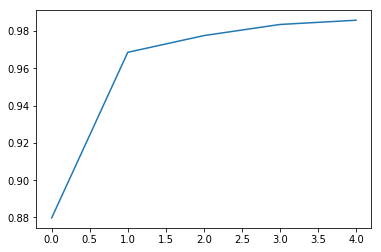

In [18]:
plt.plot(his.history[["val_acc"],['acc']])

## SIMPLE RNN

### Architecture 

In [20]:
model = Sequential()

In [21]:
model.add(SimpleRNN(128, input_shape=(x_train.shape[1:]), return_sequences=True))
model.add(Dropout(0.2))

model.add(SimpleRNN(128))
model.add(Dropout(0.2))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(10, activation='softmax'))

In [22]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 28, 128)           20096     
_________________________________________________________________
dropout_3 (Dropout)          (None, 28, 128)           0         
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 128)               32896     
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                4128      
_________________________________________________________________
dropout_5 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                330       
Total para

### Compile the Model 

In [23]:
opt = tf.keras.optimizers.Adam(lr=1e-3, decay=1e-5)

In [24]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

### Train the model 

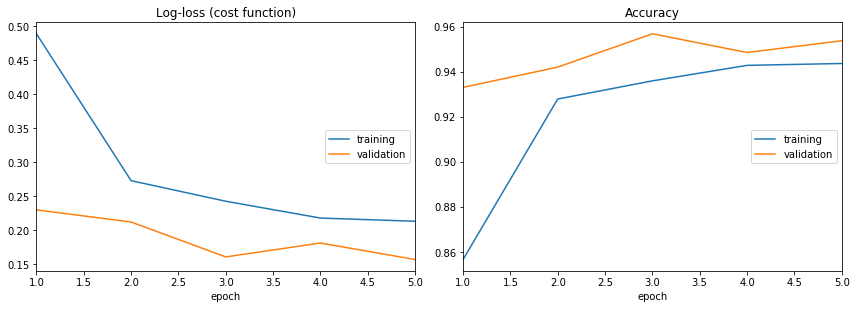

Log-loss (cost function):
training   (min:    0.213, max:    0.489, cur:    0.213)
validation (min:    0.157, max:    0.230, cur:    0.157)

Accuracy:
training   (min:    0.857, max:    0.944, cur:    0.944)
validation (min:    0.933, max:    0.957, cur:    0.954)
60000/60000 [==============================] - 67s 1ms/step - loss: 0.2134 - acc: 0.9436 - val_loss: 0.1572 - val_acc: 0.9537


In [25]:
from keras.callbacks import ModelCheckpoint  
from livelossplot.keras import PlotLossesCallback


checkpointer = ModelCheckpoint(filepath='SavedWeights.hdf6', 
                               verbose=1, save_best_only=True)

his2 = model.fit(x_train, y_train, 
          epochs=5, validation_data=(x_test, y_test),
          verbose=1, callbacks=[checkpointer, PlotLossesCallback()])
                                                                                             

In [3]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
import pandas as pd
import numpy as np

# Differences

## Time  taken per step 

In [7]:
RNN = ('LSTM', 'SimpleRNN')
time_per_step = (36, 67)

Text(0.5,0,'Time per Step')

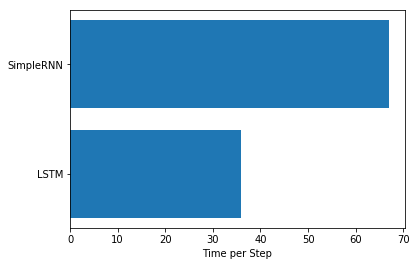

In [8]:
fig, ax = plt.subplots()
ax.barh(RNN, time_per_step)
ax.set_xlabel('Time per Step')

## Final Loss 

Text(0.5,0,'Loss')

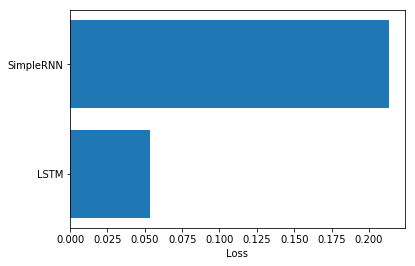

In [9]:
fig, ax = plt.subplots()
loss = (0.0538, 0.2134)
ax.barh(RNN, loss)
ax.set_xlabel('Loss')

## Final Accuracy 

Text(0.5,0,'Accuracy %')

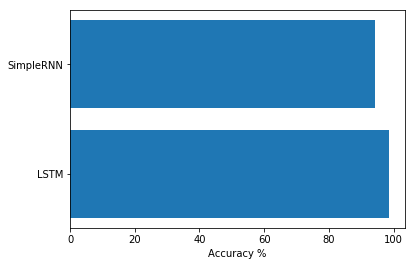

In [10]:
fig, ax = plt.subplots()
loss = (98.58, 94.36)
ax.barh(RNN, loss)
ax.set_xlabel('Accuracy %')

## Accuracy 

In [31]:
hor = [1,2,3,4,5]

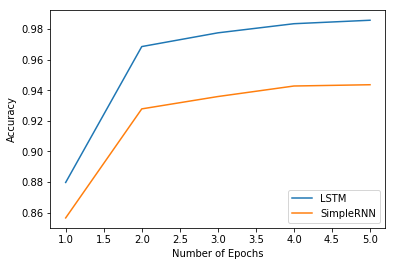

In [47]:
fig, axes = plt.subplots()
axes.plot(hor, his.history['acc'], label='LSTM')
axes.plot(hor, his2.history['acc'], label='SimpleRNN')
axes.set_xlabel('Number of Epochs')
axes.set_ylabel('Accuracy')
axes.legend()

## Loss 

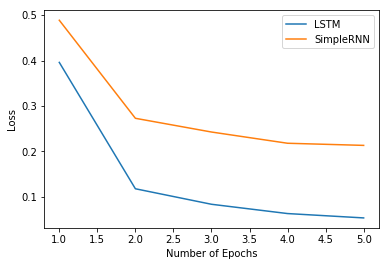

In [51]:
fig, axes = plt.subplots()
axes.plot(hor, his.history['loss'], label='LSTM')
axes.plot(hor, his2.history['loss'], label='SimpleRNN')
axes.set_xlabel('Number of Epochs')
axes.set_ylabel('Loss')
axes.legend()